In [19]:
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg
import pandas as pd
%matplotlib widget

In [20]:
h_sizes = pd.read_csv('0kGy/0kGy_hydrated.csv')
d_sizes = pd.read_csv('0kGy/0kGy_dry.csv')
pooled = [x[column] for x in [h_sizes, d_sizes] for column in x.columns]

h_img = mpimg.imread('images/hydrated.png')
d_img = mpimg.imread('images/dry.png')

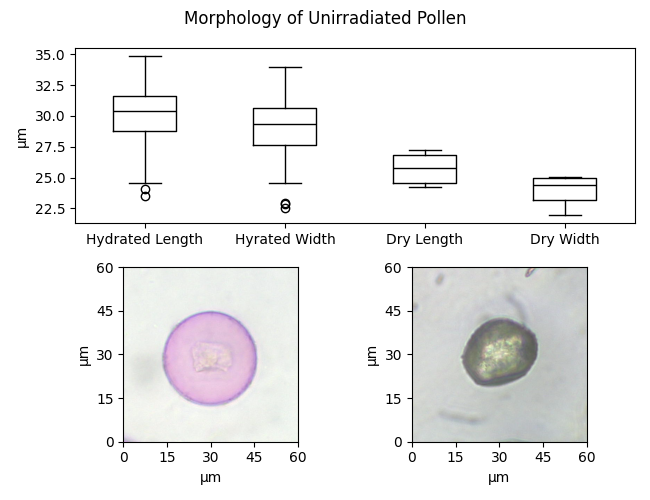

In [21]:
plt.close('all')

pollen_fig = plt.figure(figsize=(6.5, 5))
pollen_fig.suptitle('Morphology of Unirradiated Pollen')
gs = GridSpec(nrows=2, ncols=2, figure=pollen_fig)

sizes_box = pollen_fig.add_subplot(gs[0, 0:])
sizes_box.boxplot(x=pooled, medianprops={'color':'black'})
sizes_box.set(xticklabels=['Hydrated Length', 'Hyrated Width', "Dry Length", "Dry Width"],
              ylabel='µm',)

h_pollen = pollen_fig.add_subplot(gs[1, 0])
h_pollen.imshow(h_img)

d_pollen = pollen_fig.add_subplot(gs[1, 1])
d_pollen.imshow(d_img)

for ax in [h_pollen, d_pollen]:
    #image is 500x500 pixels; 8.3833 pixels/um
    im_ticks = [i for i in range(0,625,125)]
    im_ticklabels= [i for i in range(0, 75, 15)]

    ax.set(xticks=im_ticks, yticks=im_ticks,
           xticklabels=im_ticklabels, yticklabels=im_ticklabels[::-1],
           xlabel='µm', ylabel='µm')

pollen_fig.tight_layout()